# Setup Environment 

In [ ]:
# pip install opencv-python

In [ ]:
# pip install matplotlib

# Preprocessing

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
# image = cv2.imread('C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ba\\4696000994938205989_base64_45.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ba\\ba77.mine3.rm10.png', cv2.IMREAD_GRAYSCALE)

# Prewitt Operator
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
edges_prewitt_x = cv2.filter2D(image, cv2.CV_64F, kernel_prewitt_x)
edges_prewitt_y = cv2.filter2D(image, cv2.CV_64F, kernel_prewitt_y)
magnitude_prewitt = np.sqrt(edges_prewitt_x**2 + edges_prewitt_y**2)

# Roberts Operator
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
edges_roberts_x = cv2.filter2D(image, cv2.CV_64F, kernel_roberts_x)
edges_roberts_y = cv2.filter2D(image, cv2.CV_64F, kernel_roberts_y)
magnitude_roberts = np.sqrt(edges_roberts_x**2 + edges_roberts_y**2)

# Canny Operator
edges_canny = cv2.Canny(image, 50, 150)

# Laplacian Of Gaussian Operator
image_gaussian = cv2.GaussianBlur(image, (15, 15), 0)
edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)

# Sobel Operator
edges_sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
edges_sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
magnitude_sobel = np.sqrt(edges_sobel_x**2 + edges_sobel_y**2)

In [9]:
# Thresholding for Edge Detection Results
threshold = 5
detected_edges_prewitt = np.zeros_like(magnitude_prewitt)
detected_edges_prewitt[magnitude_prewitt > threshold] = 255

detected_edges_roberts = np.zeros_like(magnitude_roberts)
detected_edges_roberts[magnitude_roberts > threshold] = 255

detected_edges_canny = np.zeros_like(edges_canny)
detected_edges_canny[edges_canny > threshold] = 255

detected_edges_log = np.zeros_like(edges_log)
detected_edges_log[edges_log > threshold] = 255

detected_edges_sobel = np.zeros_like(magnitude_sobel)
detected_edges_sobel[magnitude_sobel > threshold] = 255

In [10]:
detected_edges_roberts.shape

(224, 224)

In [11]:
detected_edges_log.shape

(224, 224)

In [12]:
detected_edges_sobel.shape

(224, 224)

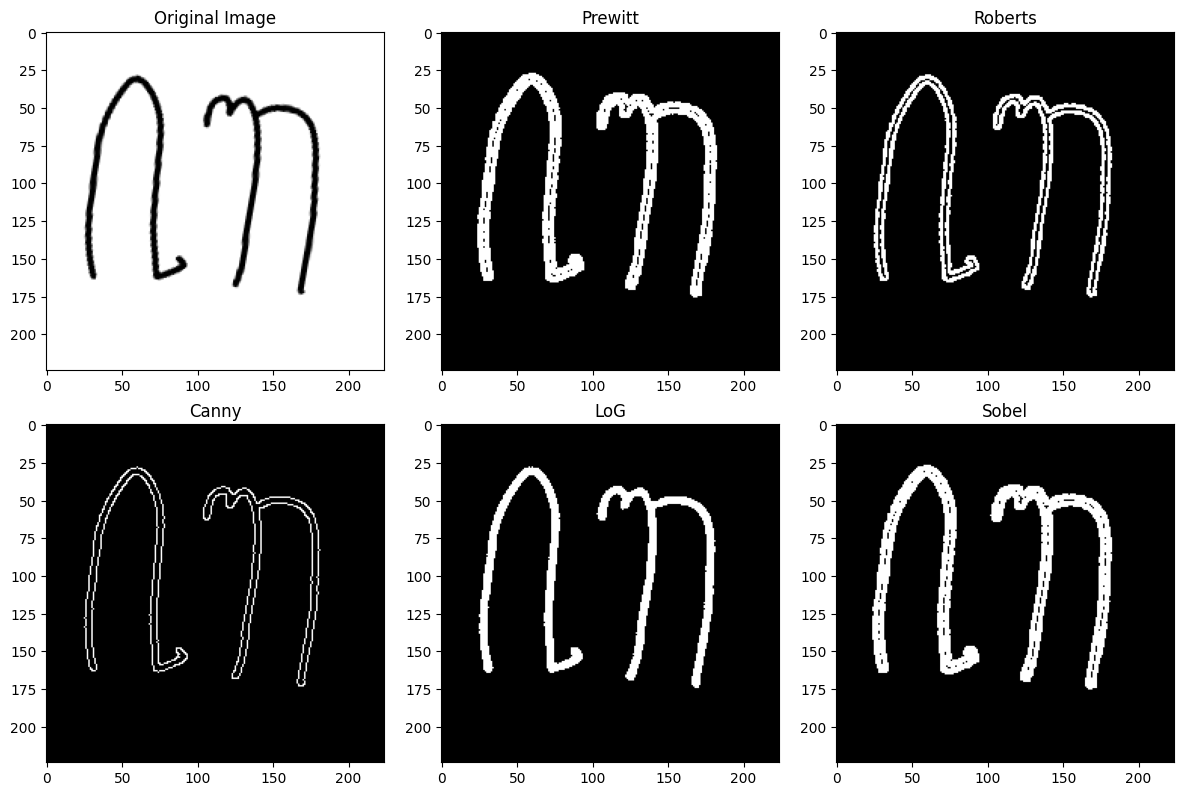

In [13]:
# Menampilkan hasil dalam satu gambar
plt.figure(figsize=(12, 8))

# Citra Asli
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Prewitt
plt.subplot(2, 3, 2)
plt.imshow(detected_edges_prewitt, cmap='gray')
plt.title('Prewitt')

# Roberts
plt.subplot(2, 3, 3)
plt.imshow(detected_edges_roberts, cmap='gray')
plt.title('Roberts')

# Canny
plt.subplot(2, 3, 4)
plt.imshow(detected_edges_canny, cmap='gray')
plt.title('Canny')

# LoG
plt.subplot(2, 3, 5)
plt.imshow(detected_edges_log, cmap='gray')
plt.title('LoG')

# Sobel
plt.subplot(2, 3, 6)
plt.imshow(detected_edges_sobel, cmap='gray')
plt.title('Sobel')

plt.tight_layout()
plt.show()

Coba 1

In [ ]:
import cv2

# Baca citra
img = cv2.imread('../data/data_original/javaneseScript_byPhiard/train/ba/ba17.meki.b.png', cv2.IMREAD_GRAYSCALE)

# Tentukan nilai threshold
threshold_value = 127

# Lakukan thresholding
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Tampilkan citra hasil
cv2.imshow('Binary Image', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar

# image = cv2.imread('../data/data_original/javaneseScript_byPhiard/train/ba/ba17.meki.b.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread("..\\data\\data_original\\javaneseScript_byPhiard\\prediction\\ba17.png", cv2.IMREAD_GRAYSCALE)

# Laplacian Of Gaussian Operator
image_gaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)

# Thresholding for Edge Detection Results
threshold = 1

detected_edges_log = np.zeros_like(edges_log)
detected_edges_log[edges_log > threshold] = 255

detected_edges_log.shape

# LoG
plt.subplot(2, 3, 5)
plt.imshow(detected_edges_log, cmap='gray')
plt.title('LoG')

In [ ]:
import cv2

# Baca gambar
image = cv2.imread('../data/data_original/javaneseScript_byPhiard/train/ba/ba17.meki.b.png', cv2.IMREAD_GRAYSCALE)

# Laplacian Of Gaussian Operator
image_gaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)

# Tampilkan gambar asli dan hasil filter LoG
cv2.imshow('Original Image', image)
cv2.imshow('Filtered Image', edges_log)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Percobaan 3

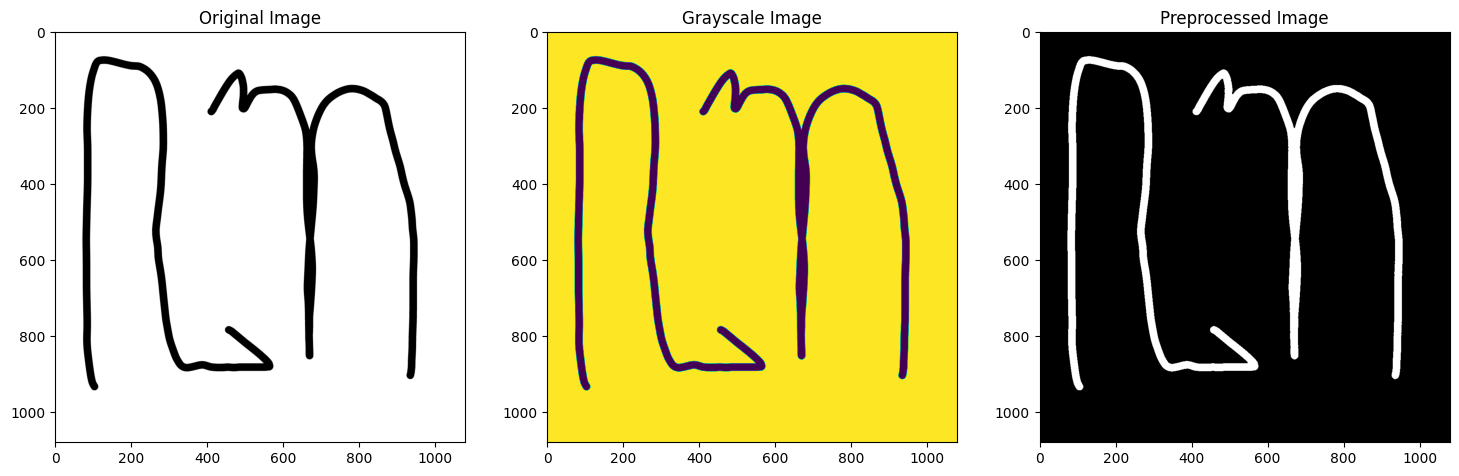

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    gaussian_3 = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 5)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load and preprocess an example image
image_path = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\javaneseScript_byPhiard\\prediction\\ba17.png"  # Ganti dengan path gambar Anda
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
preprocessed_image = apply_custom_preprocessing(grayscale_image)

# Display the images
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('on')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

# Preprocessed Image
plt.subplot(1, 3, 3)
plt.title('Preprocessed Image')
plt.imshow(preprocessed_image, cmap='gray')
plt.axis('on')

plt.show()
